# Assessed Task 2 (Individual)
* ## Traditional Machine Learning Models for Data Analysis
* ## Worth 10% of your total marks

## Submission Deadline: 11:55pm Wednesday 30th September 2020
* ### Late Submission will incur the following penalties: 20% penalty (2 marks) for 1 to 24 hours late, 40% penalty (4 marks) for 24 to 48 hours late, and 100% penalty (no marks) for over 48 hours late (iLearn assignment submission automatically closes).  


## Submission Instruction
Submitted your completed tasks in iLearn, including both this Jupyter Notebook file and its pdf version before the submission deadline. Please write your full name and student ID in the following cells for marking.

**Surname**:Nakul

**Given name**:Soni

**Student ID**:46153640

## Marking Criteria
* #### All the required data analysis tasks have been reasonably accomplished. 
* #### The organisation, presentation and readability of the report 
* #### Appropriate justification of which you have chosen and what you have done in the data analysis process, as well as critical thinking and understanding on the related aspects of the machine learning methods
* #### The quality of source code

## Task Details
Machine learning models have been widely adopted in medical and healthcare domains, e,g., many researchers made use of machine learning models to perform data analysis and prediction for the COVID-19 pandemic. In this task you are required to conduct data analysis on two healthcare related data sets with the corresponding machine learning models for regression, classification, and clustering.

You are required to use the Python packages such as Pandas, Numpy, Scipy, and Scikit-learn to implement the data analysis programs. To apply the machine learning models, you might need to pre-process the original data sets by feature selection and extraction to cater for your machine learning models (I have done most of the pre-processing). These decision-makings should be justified in your report if any. Then, you need to split the data sets released to you into training and testing data sets, and use the training data sets to build your models and the testing data sets to test the learned models. Hyperparameters tuning using your preferred cross-validation methods (e.g., k-folds) and parameter space search methods should be performed where applicable with appropriate justification. To ensure the robustness of the performance indicators, the averaged results from multiple executions of model training should be used. Both quantitative and qualitative comparisons among different methods that can be applied to the same data analysis tasks are also expected. 

I have already performed some steps to show you some initial analysis. You could learn from these examples for your tasks.

Data sets and the machine learning methods are detailed as follows, respectively.

### Description of Data Sets
* We'll look at the most relevant dataset to our lives at the moment: the global spread of COVID-19. There is an open dataset avaialable that is updated often showing the number of cases in different regions of the world. The data is being made available by Johns Hopkins University in [this GitHub repository](https://github.com/CSSEGISandData/COVID-19). We're interestd in the global confirmed cases dataset but you can also get data on deaths and recovered cases. I have done the feature extraction from the original data series for the data analysis tasks.
* The other dataset you will investigate is the Pima Indians Diabetes Dataset that comes originally from the National Institute of Diabetes and Digestive and Kidney Disease. The data is available in a single csv file but since it is real world data it contains a number of null values.

### Data Analysis Task
|Dataset|Analysis Task|
|:---|:---:|
|COVID-19 data | Regression; Clustering |
|Pima data | SVM for Classification; Random Forest Classification|

#### Notes:  You could include more machine learning models, as well as more data sets if you wish. Refer to https://scikit-learn.org/stable/ for scikit-learn documentations

## You are required to complete the task 1-10
In each task, you are expected to write code and answer a question with detailed justification.

In [1]:
# Import the commonly-used Python packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### For COVID-19 data
For this dataset, we will perform regression and clustering analysis.

In [2]:
# Load the time series dataset
covid_data_location = 'time_series_covid19_confirmed_global_till-28-Aug.csv'
covid = pd.read_csv(covid_data_location)
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471


In [3]:
# As some counties have more than one rows (e.g., Australia has one for each state), we need to combine all the rows for one country.
grouped = covid.groupby('Country/Region').sum()
# Just drop the unnecessary location information.
grouped = grouped.drop(columns=['Lat', 'Long'])
# Now each country has a time series for the accumulated confirmed case.
grouped.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140
Albania,0,0,0,0,0,0,0,0,0,0,...,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195
Algeria,0,0,0,0,0,0,0,0,0,0,...,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403
Andorra,0,0,0,0,0,0,0,0,0,0,...,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124
Angola,0,0,0,0,0,0,0,0,0,0,...,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471


Text(0, 0.5, '# Cumulative Confirmed Cases')

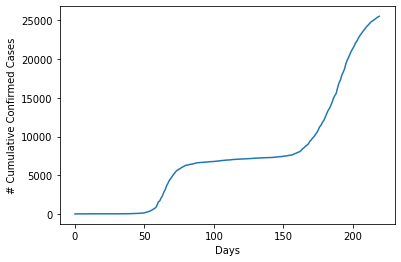

In [4]:
# Following is a simple visualization to give you the basic idea how a time series look like, with Australia as an example.
from matplotlib import pyplot as plt
data_series_Aus = pd.DataFrame(grouped.loc['Australia', :].values)
plt.plot(range(grouped.shape[1]), data_series_Aus)
plt.xlabel('Days')
plt.ylabel('# Cumulative Confirmed Cases')

As to the regression analysis, we aim to build a predictive model to predict the number of confirmed cases from the historical data of daily confirmed cases.

Text(0, 0.5, '# Daily Confirmed Cases')

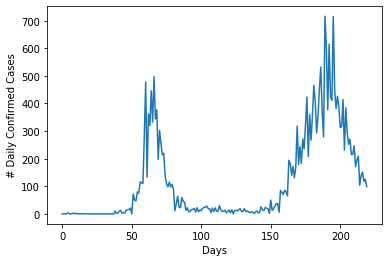

In [5]:
# Get the daily confirmed cases and show the plot.
data_series_Aus_daily = data_series_Aus - pd.concat([pd.DataFrame([0]), data_series_Aus.drop(index=(data_series_Aus.shape[0]-1))], ignore_index=True)
plt.plot(range(data_series_Aus_daily.shape[0]), data_series_Aus_daily)
plt.xlabel('Days')
plt.ylabel('# Daily Confirmed Cases')

As suggested by the medical research, the incubation period of COVID-19 virus is 2 weeks. It would be interesting to do feature extraction on the time series with the past 14 days. Lag features are usually used for time series data in order to embedding the temporal informaiton in features.

In [6]:
# Feature extraction with 2 weeks lag for Australian time series data
lag = 14
data_Aus_daily = data_series_Aus_daily
for i in range(lag):
    temp = pd.concat([data_series_Aus_daily.shift(i+1), data_Aus_daily], axis=1)
    data_Aus_daily = temp

# Set the temporal feature names
names=[]
for i in range(lag):
    names.append('t-'+str(14-i))
names.append('t')
data_Aus_daily.columns=names

# Remove the missing or NaN values introduced by the feature extraction
data_Aus_daily.dropna(inplace=True)
data_Aus_daily.reset_index(drop=True, inplace=True)
data_Aus_daily

,t-14,t-13,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0,1.0,0
1,0.0,0.0,0.0,4.0,1.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,1
2,0.0,0.0,4.0,1.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,1
3,0.0,4.0,1.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,0
4,4.0,1.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,316.0,414.0,231.0,384.0,293.0,252.0,271.0,215.0,216.0,247.0,171.0,195.0,209.0,104.0,138
202,414.0,231.0,384.0,293.0,252.0,271.0,215.0,216.0,247.0,171.0,195.0,209.0,104.0,138.0,151
203,231.0,384.0,293.0,252.0,271.0,215.0,216.0,247.0,171.0,195.0,209.0,104.0,138.0,151.0,118
204,384.0,293.0,252.0,271.0,215.0,216.0,247.0,171.0,195.0,209.0,104.0,138.0,151.0,118.0,126


### Regression

After the feature extraction, we can build a predictive model based on the past 14 days historical data of the number daily confirmed cases. Following is the example for Australian data. We build an [ordinary linear regression model](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) after spliting the data into training and testing datasets. We use both r2 score and RMSE (Root Mean Squared Error) as the [performance metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter). We also show the learned model parameters, i.e., the feature coefficients and the intercept.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Specify the features and the target
X = data_Aus_daily.drop(['t'], axis=1)
y = data_Aus_daily['t']

# Split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build a linear regression model from the training data
lr = LinearRegression().fit(X_train, y_train)

# Perform prediction on the testing data
y_pred = lr.predict(X_test)

# Evaluate the prediction performance by r2 score and RMSE
print('Testing r2 score: %.4f \n' % r2_score(y_test, y_pred))
print('Testing RMSE value: %.4f \n' % np.sqrt(mean_squared_error(y_test, y_pred)))

print('Coefficients: ', lr.coef_)
print('Intercept: %.4f \n' % lr.intercept_)

Testing r2 score: 0.6779 

Testing RMSE value: 80.8597 

Coefficients:  [0.0457 0.1378 -0.0868 -0.0930 -0.2154 -0.0467 -0.2926 -0.1208 0.3140
 0.2979 0.1582 0.6078 0.1946 0.0470]
Intercept: 8.6680 



In [8]:
data_Aus_daily

,t-14,t-13,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0,1.0,0
1,0.0,0.0,0.0,4.0,1.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,1
2,0.0,0.0,4.0,1.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,1
3,0.0,4.0,1.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,0
4,4.0,1.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,316.0,414.0,231.0,384.0,293.0,252.0,271.0,215.0,216.0,247.0,171.0,195.0,209.0,104.0,138
202,414.0,231.0,384.0,293.0,252.0,271.0,215.0,216.0,247.0,171.0,195.0,209.0,104.0,138.0,151
203,231.0,384.0,293.0,252.0,271.0,215.0,216.0,247.0,171.0,195.0,209.0,104.0,138.0,151.0,118
204,384.0,293.0,252.0,271.0,215.0,216.0,247.0,171.0,195.0,209.0,104.0,138.0,151.0,118.0,126


If executing the above cell again, we might get different results due to the randomness in the train-test data splitting proess. To get more robust resuts, we could make use of the k-fold cross validation.

**Task-1** (1 mark): Use 5-fold cross validation (CV) to the two report performance metrics, i.e., r2 (coefficient of determination) and RMSE. Specifically, you can use the [cross_val_score function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score). You need to report the mean and std values, as well as the min-max range for each performance metric. An example output is provided for the expected souce code. Note that your actual output might be different from the example.

In [19]:
# Your code here
import math
from sklearn import model_selection
from sklearn.model_selection import cross_val_score,cross_validate
regressor = LinearRegression()
kfold = model_selection.KFold(n_splits=5, random_state=42)
scores = cross_val_score(lr,X, y,scoring='r2',cv=kfold)

print("R2 Mean:", scores)
print("R2 Mean:", scores.mean())
print("R2 Standard deviation:", scores.std())
print("R2 Min and Max value ",scores.min(),scores.max())
#scoring = {
               #'abs_error': 'neg_mean_absolute_error',
               #'squared_error': 'neg_mean_squared_error'}
cv_score=cross_val_score(regressor, X, y, scoring='neg_mean_squared_error',cv=kfold)
cv_score
RMSE=np.sqrt(abs(cv_score))
print("RMSE mean :",  RMSE.mean())
print("RMSE Standard deviation:", RMSE.std())
print("RMSE Min and Max value ", RMSE.min(), RMSE.max())


R2 Mean: [0.6469 0.4652 -3.2387 0.8014 0.4528]
R2 Mean: -0.1744910539380855
R2 Standard deviation: 1.5374903101876094
R2 Min and Max value  -3.2387420136024696 0.8014250831463663
RMSE mean : 59.19846273889194
RMSE Standard deviation: 43.24007263929829
RMSE Min and Max value  12.581334451392287 113.93035092582147


In [14]:
print(kfold.get_n_splits)

<bound method _BaseKFold.get_n_splits of KFold(n_splits=5, random_state=7, shuffle=True)>


The above built models are for Australia, and might not be able to applicable to other countries. To build a more general linear regression model, let's make of the data from all countries.

In [10]:
# Feature extraction with 2 weeks lag for all countries's daily confirmed cases
lag = 14
data = pd.DataFrame()
for i in grouped.index:
    data_series_country = pd.DataFrame(grouped.loc[i].values)
    data_series_country_daily = data_series_country - pd.concat([pd.DataFrame([0]), data_series_country.drop(index=(data_series_country.shape[0]-1))], ignore_index=True)
    data_country_daily = data_series_country_daily
    for i in range(lag):
        temp = pd.concat([data_series_country_daily.shift(i+1), data_country_daily], axis=1)
        data_country_daily = temp
    #print(data_country)
    data = pd.concat([data, data_country_daily], ignore_index=True)
#data = data.dropna(ignore_index=True)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

names=[]
for i in range(lag):
    names.append('t-'+str(14-i))
names.append('t')
data.columns=names
data

,t-14,t-13,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38723,99.0,70.0,75.0,97.0,82.0,104.0,85.0,47.0,70.0,265.0,102.0,70.0,78.0,37.0,140
38724,70.0,75.0,97.0,82.0,104.0,85.0,47.0,70.0,265.0,102.0,70.0,78.0,37.0,140.0,126
38725,75.0,97.0,82.0,104.0,85.0,47.0,70.0,265.0,102.0,70.0,78.0,37.0,140.0,126.0,55
38726,97.0,82.0,104.0,85.0,47.0,70.0,265.0,102.0,70.0,78.0,37.0,140.0,126.0,55.0,41


**Task 2** (1 mark): Now we can see that we have a much larger dataset, with 38,728 rows of data instances. Similar to what you do in Task 1, use 5-fold cross validation (CV) to the two report performance metrics, i.e., r2 and RMSE. 

In [11]:
# Your code here
import math
from sklearn.model_selection import cross_val_score,cross_validate
x_score=data.drop(['t'],axis=1)
y_score =data['t']
regressor = LinearRegression()
kfold = model_selection.KFold(n_splits=5, random_state=7, shuffle=True)
scores = cross_val_score(regressor,x_score, y_score,scoring='r2',cv=kfold)
print("R2 Mean:", scores.mean())
print("R2 Standard deviation:", scores.std())
print("R2 Min and Max value ",scores.min(),scores.max())

scores_data = cross_validate(regressor, x_score, y_score,cv=kfold, scoring='neg_mean_squared_error')
RMSE_data=np.sqrt(abs(scores_data['test_score']))
print( "RMSE mean :", RMSE_data.mean())
print("RMSE Standard deviation:",RMSE_data.std())
print("RMSE Min and Max value ",RMSE_data.min(),RMSE_data.max())


R2 Mean: 0.9728382345195868
R2 Standard deviation: 0.007039367724905164
R2 Min and Max value  0.9633181475564432 0.9808137859866721
RMSE mean : 637.6956893633811
RMSE Standard deviation: 61.10013529583444
RMSE Min and Max value  561.5902985908352 736.753133556802


**Task 3** (1 mark): Comparing the r2 score of the model built from the Australian data with that from the all countries, which is better? Can you explain why it is better? You could consider this from the relationship between the overfitting issue and the training data size.


**[Your answer]**:
We have applied Linear Regression model on the Australian dataset and the world data set and find out their "r2 score and RMSE value".R2 value is defined as the proportion of variance in the dependent variable that can be find by independent variable.Greater value of r2 implies more accurate is our model.So, if the value of r2 is closer to 1 or equal to 1 , then the dependent and independent variable are strongly correlated to each other. R2 value in the Australian is greater than 0.5 but it is not very close to 1, whereas R2 value of world data is 0.97 which is closer to 1, so the Linear regression model on the world data set is better than the linear regression model on the Australian data.

Higher r2 value is obtained by increasing the size of the data.So, when we applied Linear regression model on the world data, size of the data is increases as now the data of all other countries are added, due to which r2 value gets improved.But, as we know that increasing the size of the training data set can ulitmately leads to overfitting issue.So, we could have over-fitting issue in our model.

### Clustering
We will perform clustering analysis on the Australian data. I will show the result of [hierarchical clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html) to give your the basic informaiton of the clustering structure in the data set. Then, you are required perform clusterin analysis with the [K-Means algorithm](https://scikit-learn.org/stable/modules/clustering.html#k-means).

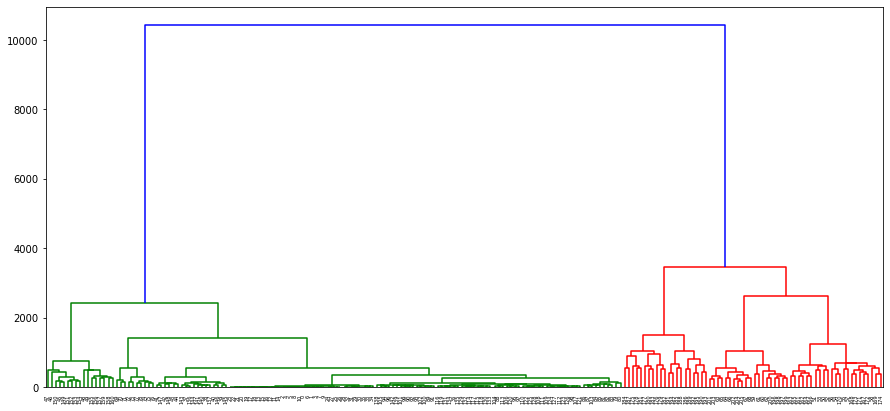

In [12]:
# Using the hierachical clustering to show the nature clustering structure in the data
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist

# compute the distance matrix
dist = pdist(data_Aus_daily, 'euclidean')
linkage_matrix = linkage(dist,method = 'ward')

plt.figure(figsize=(15,7))
dendrogram(linkage_matrix)
plt.show()

**Task 4** (1 mark): It can be seen from the above dendrogram that there are obviously two clusters in the data. Use the K-Means algorithm to conduct clustering analysis, with K=2. What are the cluster means/centres? How much is the inertia (total data distortion)?

In [13]:
# Your code here
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_
print("Kmeans inertia (total data distortion) :",kmeans.inertia_)
print("cluster center is :",kmeans.cluster_centers_)

Kmeans inertia (total data distortion) : 23097479.431899644
cluster center is : [[28.2222 26.6667 26.0903 25.6597 25.7222 25.7014 26.1667 26.9097 28.0833
  31.5347 35.2986 37.2153 40.2569 43.7500]
 [305.9839 313.6613 319.3710 323.8387 327.1774 331.1452 332.8065 334.2258
  334.8548 328.4677 321.9516 319.8871 314.7258 308.6452]]


**Taks 5** (1 mark): To study the clustering performance change with respect to the number of clusters, we make use of a clustering performance metric [Davies-Bouldin score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html?highlight=davies_bouldin_score#sklearn.metrics.davies_bouldin_score) which is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. The range of K is between 2 to 10 (inclusive). You are required to plot the DB scores with respect to the K value. A example plot is show from the expected souce code. Note that yours might be different from the example. What are the findings from the plot?

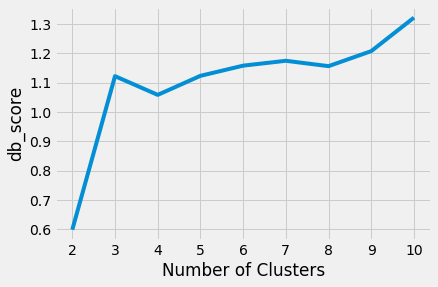

In [14]:
# Your code here
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
db_score=[]
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
    "random_state": 42,
 }
for i in range(2,11):
    neigh = KMeans(n_clusters=i,**kmeans_kwargs).fit(X)
    labels = neigh.labels_
    dav_score=davies_bouldin_score(X, labels)
    db_score.append(dav_score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), db_score)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("db_score")
plt.show()

**[Your observation and findings from the above plot]**:

Davies-Bouldin score is used to find the measure the average of the cluster with its similar cluster.We plot a graph between Davies-Bouldin score and number of cluster to find out the relation between them.As we can see that there is linear relationship between the Davies-Bouldin score and the number of cluster, as the number of cluster increases Davies-Bouldin score is also increases.We can also see that if we have smaller number of cluster, then Davies-Bouldin score is low which indicates that there is less similarity between the clusters as we have less number of cluster, but when we increase the number of cluster then we would have more cluster to find the similarty and they are less disperesed which ultimately leads to high Davies-Bouldin score.

### For Pima data

In [15]:
# Load the datasets. Note that there are missing values in the data set. When loading the data, we convert the missing value as NaN
pima_data = pd.read_csv('pima-indians-diabetes.csv', na_filter=True, na_values='?')

# Show statisitical information for each feature
pima_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
# show some data instances for the dataset
pima_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [17]:
# Check the statistical information for the missing values
print('Number of missing Values per Feature:')
print(pima_data.isnull().sum())

Number of missing Values per Feature:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


**Task 6** (0.5 mark): Data pre-processing: Imputate the missing values with the feature mean values. Specifically, you can make use of the [SimpleImputer class](https://scikit-learn.org/stable/modules/impute.html#impute) to achieve this purpose.

In [18]:
# Your code here
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
pima_data.Glucose=imp.fit_transform(pima_data.Glucose.values.reshape(-1,1))[:,0]
pima_data.BloodPressure=imp.fit_transform(pima_data.BloodPressure.values.reshape(-1,1))[:,0]
pima_data.SkinThickness=imp.fit_transform(pima_data.SkinThickness.values.reshape(-1,1))[:,0]
pima_data.Insulin=imp.fit_transform(pima_data.Insulin.values.reshape(-1,1))[:,0]
pima_data.BMI=imp.fit_transform(pima_data.BMI.values.reshape(-1,1))[:,0]

In [19]:
# Check if the missing values have been imputated
print(pima_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Another important pre-processing step is to scale/standadize different features in order to make their contribution to a ML model equally.

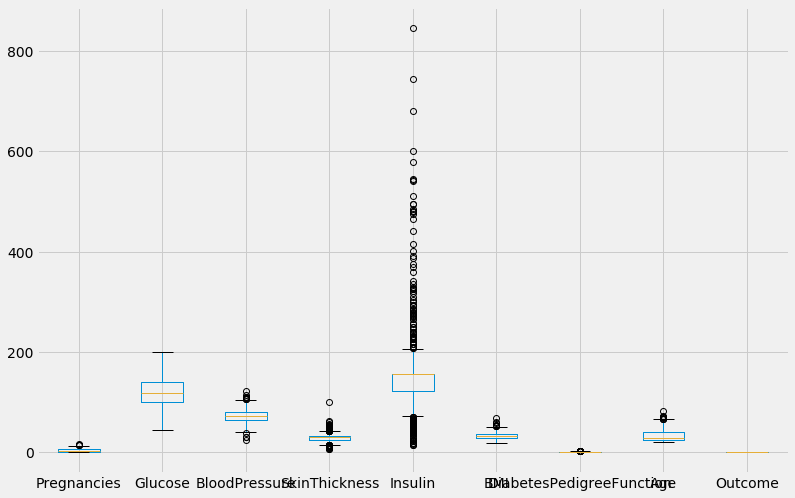

In [20]:
# Let's study the original distribution of each feature.
pima_data.plot(kind='box', figsize=(12, 8))

**Task 7** (0.5 marks): It can be seen from the above plot that each feature has a quite different range from others. Use the scaler functions provided by the sklearn package to standardize the features. Specifically, use the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) to scale each feature to the range [0, 1].

In [21]:
# Your code here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(pima_data))
MinMaxScaler()
print(scaler.data_max_)
pima_data.Pregnancies=scaler.fit_transform(pima_data.Pregnancies.values.reshape(-1,1))[:,0]
pima_data.Glucose=scaler.fit_transform(pima_data.Glucose.values.reshape(-1,1))[:,0]
pima_data.BloodPressure=scaler.fit_transform(pima_data.BloodPressure.values.reshape(-1,1))[:,0]
pima_data.SkinThickness=scaler.fit_transform(pima_data.SkinThickness.values.reshape(-1,1))[:,0]
pima_data.Insulin=scaler.fit_transform(pima_data.Insulin.values.reshape(-1,1))[:,0]
pima_data.BMI=scaler.fit_transform(pima_data.BMI.values.reshape(-1,1))[:,0]
pima_data.DiabetesPedigreeFunction=scaler.fit_transform(pima_data.DiabetesPedigreeFunction.values.reshape(-1,1))[:,0]
pima_data.Age=scaler.fit_transform(pima_data.Age.values.reshape(-1,1))[:,0]
pima_data.Outcome=scaler.fit_transform(pima_data.Outcome.values.reshape(-1,1))[:,0]


MinMaxScaler(copy=True, feature_range=(0, 1))
[17.0000 199.0000 122.0000 99.0000 846.0000 67.1000 2.4200 81.0000 1.0000]


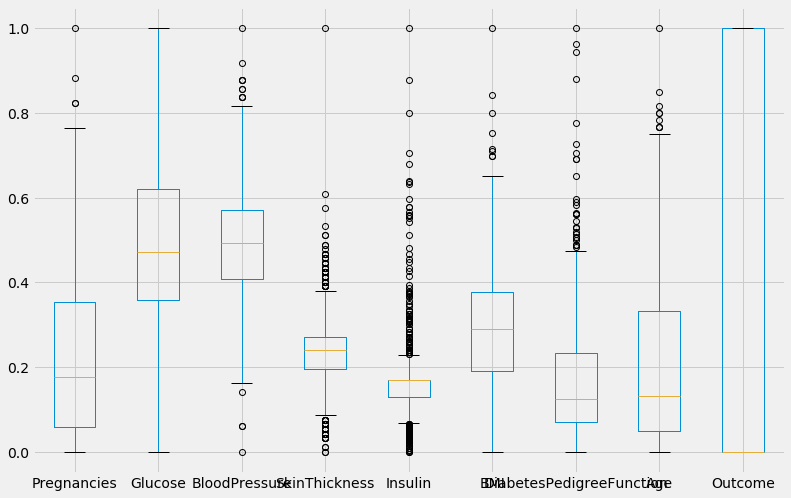

In [22]:
# Check if all the features are standardized to [0,1]
pima_data.plot(kind='box', figsize=(12, 8));

After the data pre-processing, we train and test two classification models covered in our lectures, i.e., [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier).

In [23]:
# Specifying features and the target
X = pima_data.drop('Outcome', axis=1)
y = pima_data['Outcome']

In [24]:
# Split the data into training and testing data
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train and evaluate a SVC model
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
print('SVC classifier accuracy: %.4f\n' % svc.score(X_test, y_test))

# Train and evaluate a Random Forest classification model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(X_train, y_train)
print('Random Forest classifier accuracy: %.4f\n' % rfc.score(X_test, y_test))

SVC classifier accuracy: 0.7662

Random Forest classifier accuracy: 0.7273



**Task 8** (0.5): Try other performance metrics. In the evaluation of the above models, the accuracy measure is used. You are required to report other metrics like precision, recall, and f1-score, as well as confusion matrix, using the ['classification_report' class](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report#sklearn.metrics.classification_report) and the ['confusion_matrix' class](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion%20matrix#sklearn.metrics.confusion_matrix). An example output is provided for the expected souce code. Note that your actual output might be different from the example.

In [25]:
# Your code here
#SVC classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
y_predict=svc.predict(X_test)
print("Classfication report:",classification_report( y_test,y_predict))
print("confusion matrix is given by :",confusion_matrix(y_test,y_predict))

#Random forest classification report and confusion matrix
from sklearn.metrics import classification_report
y_pred=rfc.predict(X_test)
print("Classfication report:",classification_report( y_test,y_pred))
print("confusion matrix is given by :",confusion_matrix(y_test,y_pred))

Classfication report:               precision    recall  f1-score   support

         0.0       0.78      0.91      0.84       102
         1.0       0.74      0.48      0.58        52

    accuracy                           0.77       154
   macro avg       0.76      0.70      0.71       154
weighted avg       0.76      0.77      0.75       154

confusion matrix is given by : [[93  9]
 [27 25]]
Classfication report:               precision    recall  f1-score   support

         0.0       0.76      0.85      0.81       102
         1.0       0.62      0.48      0.54        52

    accuracy                           0.73       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.72      0.73      0.72       154

confusion matrix is given by : [[87 15]
 [27 25]]


**Task 9** (1.5 mark): As we discussed in the lecture, SVM can work with different kernels. We can use k-fold cross valiation to choose the suitable kernel for the dataset. You are required to make use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) method  to search the best kernel for the Pima dataset. We adopt the accuracy performance metric as the score during the search. The kernels consider for the tuning are: {'linear', 'poly', 'rbf', 'sigmoid'}. We use 5-fold cross-validation in this task. What is the best kernel? What is the best score corresponding to the best kernel? You could get such information from the GridSearchCV results. An example output is provided for the expected souce code. Note that your actual output might be different from the example.

In [26]:
# Your code here
from sklearn.model_selection import GridSearchCV
param={'kernel':('linear', 'rbf','poly','sigmoid')}
# Create the machine learning model
svm=SVC()
clf = GridSearchCV(svm,param, cv=5)
clf.fit(X, y)

# Identify the best parameter(s)
print('Best value for kernel is: ', clf.best_params_['kernel'])
print('The best score is: ', clf.best_score_)


Best value for kernel is:  poly
The best score is:  0.7682539682539682


**Task 10** (2 marks): As you know, the random forest model is a type of ensemble learning. The number of base estimator/learning is an important hyperparameter affecting the performance. In this task, you are required to study the change of classification performance with respect to the number of base estimators. Similar to the above case, use GridSearchCV to identify the best hyperparameter for 'n_estimators' in RandomForestClassifier. The value of n_estimators is limited to the range [1, 10]. So, you just need to try these 10 possible values. What is the best number of estimators? What is the corresponding score? You could get such information from the GridSearchCV results. An example output is provided for the expected souce code. Note that your actual output might be different from the example.

In [27]:
# Your code here
 
parameter_grid = {'n_estimators': range(1,11)}

# Create the machine learning model
rfm = RandomForestClassifier()
clf_grid = GridSearchCV(rfm, parameter_grid, cv=10)
clf_grid.fit(X, y)

# Identify the best parameter(s)
print('Best estimator: ', clf_grid.best_params_['n_estimators'])
print('best score: ', clf_grid.best_score_)

Best estimator:  8
best score:  0.7643711551606289


Further more, you can use the information from GridSearchCV.cv_results_ to investigate how the performnace metrics change with respect to the tuning of hyperparameters.

In [28]:
# Show the information contained in cv_results_
print(clf_grid.cv_results_)
# Your code here

{'mean_fit_time': array([0.0030, 0.0044, 0.0052, 0.0065, 0.0076, 0.0092, 0.0105, 0.0118,
       0.0134, 0.0150]), 'std_fit_time': array([0.0009, 0.0005, 0.0004, 0.0005, 0.0005, 0.0006, 0.0005, 0.0004,
       0.0005, 0.0007]), 'mean_score_time': array([0.0013, 0.0011, 0.0010, 0.0012, 0.0014, 0.0014, 0.0012, 0.0015,
       0.0017, 0.0014]), 'std_score_time': array([0.0005, 0.0003, 0.0000, 0.0004, 0.0005, 0.0005, 0.0004, 0.0005,
       0.0007, 0.0005]), 'param_n_estimators': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 1}, {'n_estimators': 2}, {'n_estimators': 3}, {'n_estimators': 4}, {'n_estimators': 5}, {'n_estimators': 6}, {'n_estimators': 7}, {'n_estimators': 8}, {'n_estimators': 9}, {'n_estimators': 10}], 'split0_test_score': array([0.6883, 0.6883, 0.6494, 0.6623, 0.6623, 0.7273, 0.7143, 0.7403

clf_grid.cv_results_ is an dictionary object in which column headers are key and value of dictionary is column, it can imported as datafram.So, in our case, when we apply GridSearchCV with randomforest on pima dataset, we will estimators and based on the estimators we have there accuracy score, mean_test_score and std_test_score.We also have time to calculate each of the parameter.

Particularly, you can make use of the performance score mean and std values to plot the relationship between the performance scores and the number of estimators. You can use the ['errorbar' function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) to achieve this. A example plot is show from the expected souce code. Note that yours might be different from the example. What are the findings from the plot?

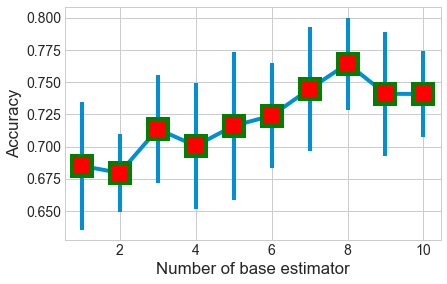

In [29]:
# Plot the relationship beween accuracy score and the number of base estimators
#import matplotlib.pyplot.errorbar
# Your code here
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
y= clf_grid.cv_results_['mean_test_score']                
yerr=clf_grid.cv_results_['std_test_score']
plt.xlabel("Number of base estimator")
plt.ylabel("Accuracy")
plt.errorbar(range(1,11), y,yerr, marker='s', mfc='red',
         mec='green', ms=20, mew=4)
plt.show()

**[Your observation and findings from the above plot]**:

The above plot has been used to find the relationship between number of estimators and the accuracy, it is achieved by plotting the mean_test_score and estimator range as a data points and std_test_score is used as yerror.The yerr indicates the how the reported value is different from the true value.So, from the graph we see that there is a linear relationship between accuracy and number of estimators, if we increase the number of estmators, accuracy will also increase.Similarly, there is a linear relationship between error and accuracy, as the accuracy increases ,range of errobar decreases, for e.g. if the number of estimator is 8, then accuracy is 0.75, and the range of errorbar is least.